In [6]:
from gammapy.datasets import MapDataset
from gammapy.maps import Map
from astropy.coordinates import SkyCoord, Angle

from pathlib import Path
from modules.variables import *

from GPyUtils.map_processor import MapProcessor

import json
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# Define the name of the dataset file
IDs = 'diffuse+fermi'
e_min = 1
e_max = 200
bin = 20
binsz = 0.02
dataset_name = f"width_22x10/dataset_{IDs}_ene_{e_min}_{e_max}_bin_{bin}_binsz_{binsz}.fits.gz"

In [8]:
dataset = MapDataset.read(filename= path_to_datasets / dataset_name)

In [9]:
# The maps are cubes, with an energy axis.
# Let's also make some images:
dataset_image = dataset.to_image()
counts = dataset_image.counts
exposure_image = dataset_image.exposure.sum_over_axes()

map_processor = MapProcessor(counts)

new_map = map_processor.create_corrected_counts_map(exposure_image, normalize=True)

<WCSAxes: >

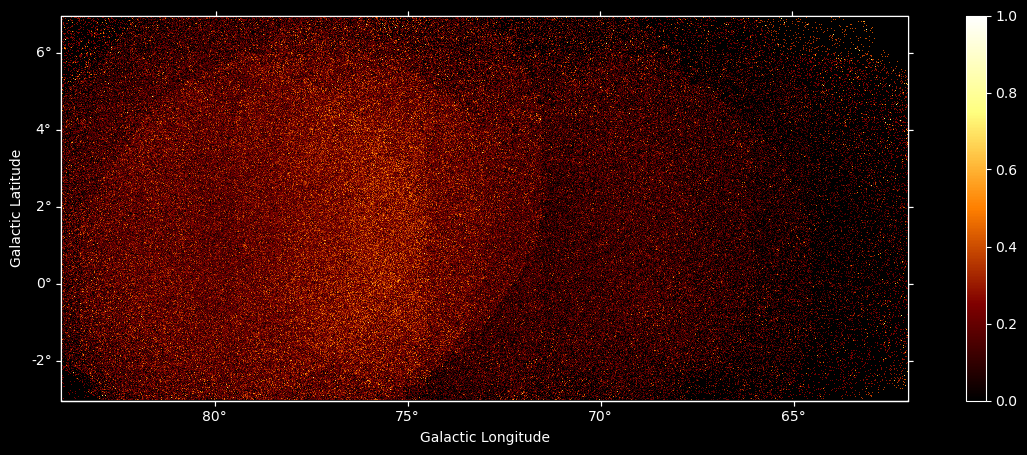

In [10]:
plt.figure(figsize=(15,5))
new_map.plot(add_cbar=True)

In [3]:
# To read maps from disk
#mask_map = Map.read("exclusion_mask.fits")
mask_map = Map.read("maps/exclusion_mask_width_22_10.fits")
#mask_map = Map.read("maps/exclusion_mask_width_22_5.fits")
mask_map.data = mask_map.data.astype(bool)

<WCSAxesSubplot: >

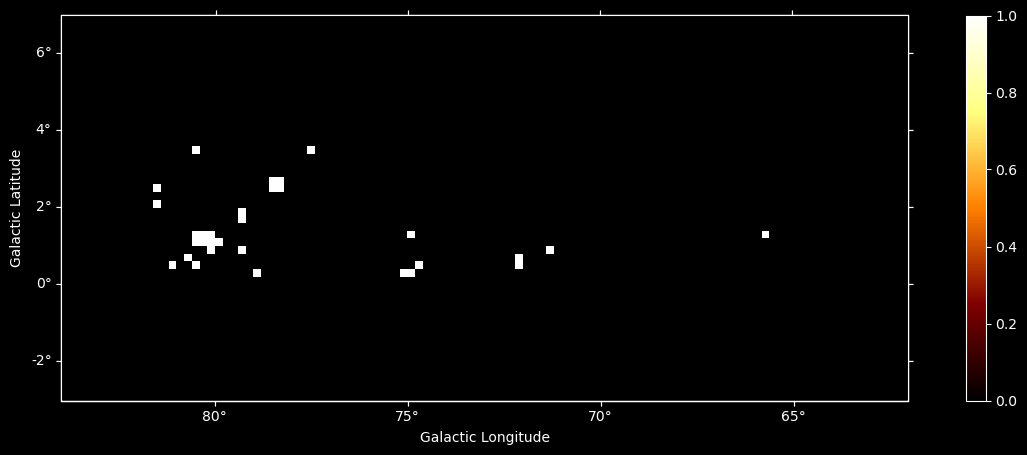

In [4]:
plt.figure(figsize=(15,5))
mask_map.plot(add_cbar=True)

### Show the diffuse counts map

In [3]:
# The maps are cubes, with an energy axis.
# Let's also make some images:
dataset_image = dataset.to_image()

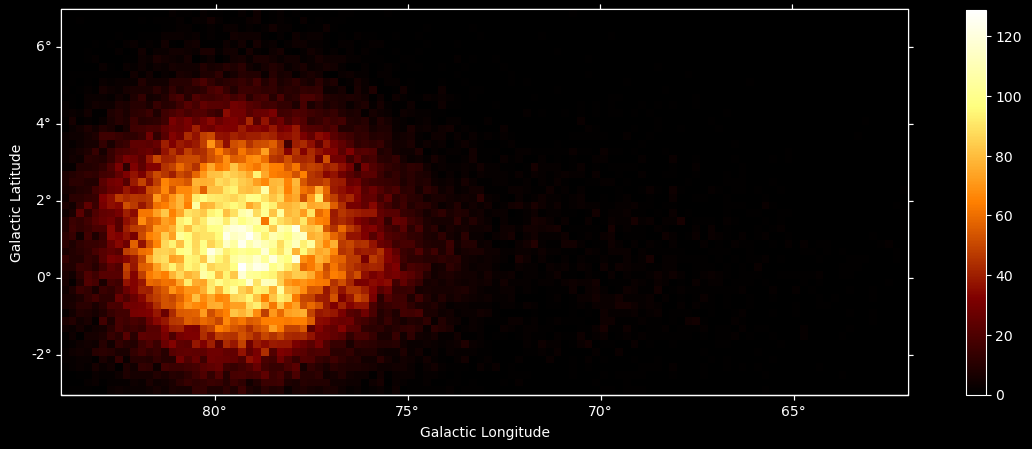

In [4]:
#white dots are the pointing positions
plt.figure(figsize=(15, 5))
counts = dataset_image.counts
#ax = counts.smooth(2).plot(add_cbar=True)
ax = counts.plot(add_cbar=True)
'''ax.scatter(
    pos_obs.l.deg,
    pos_obs.b.deg,
    transform=plt.gca().get_transform("galactic"),
    color="none",
    edgecolor="white",
    marker="o",
    s=10,
    lw=1,
)'''
plt.show()

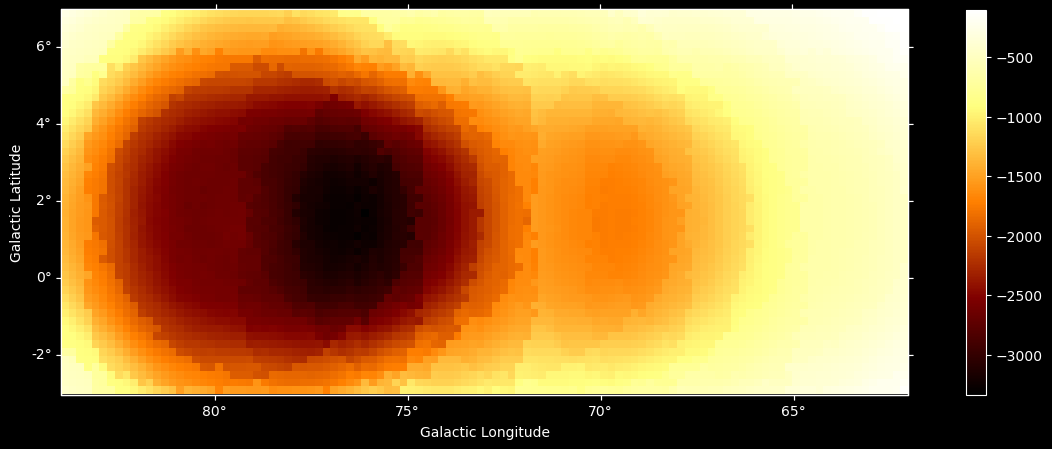

In [5]:
plt.figure(figsize=(15, 5))
excess = dataset_image.excess
#ax = counts.smooth(2).plot(add_cbar=True)
ax = excess.plot(add_cbar=True)
plt.show()

In [8]:
'''# Apply mask to counts
counts.data = counts.data - (counts.data * mask_map)
# Compute the median of the non-zero elements
m = np.median(counts.data[counts.data > 0])
# Assign the median to the zero elements 
counts.data[counts.data == 0] = m
'''
# Apply mask to excess
excess.data = excess.data - (excess.data * mask_map)
# Compute the median of the non-zero elements
m = np.median(excess.data[excess.data > 0])
# Assign the median to the zero elements 
excess.data[excess.data == 0] = m 

### Show the exposure map

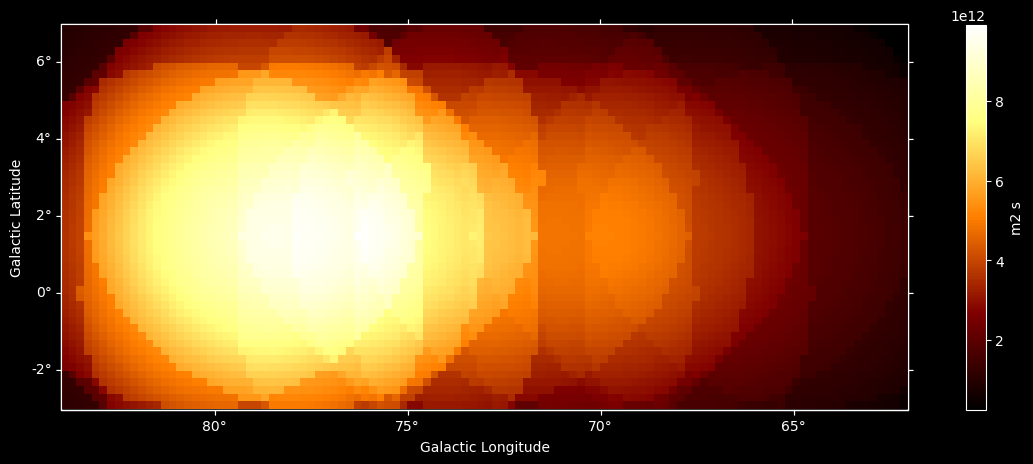

In [6]:
plt.figure(figsize=(15,5))
exposure_image = dataset_image.exposure.sum_over_axes()
#exposure_image.smooth("0.06 deg").plot(add_cbar=True)
exposure_image.plot(add_cbar=True)
plt.show()

### Show the counts/exposure map
The two maps have different geometries, so a little bit of manipulation is needed

In [7]:
new_map = createCorrectedCountsMap(excess, exposure_image, normalize=True)

<WCSAxesSubplot: >

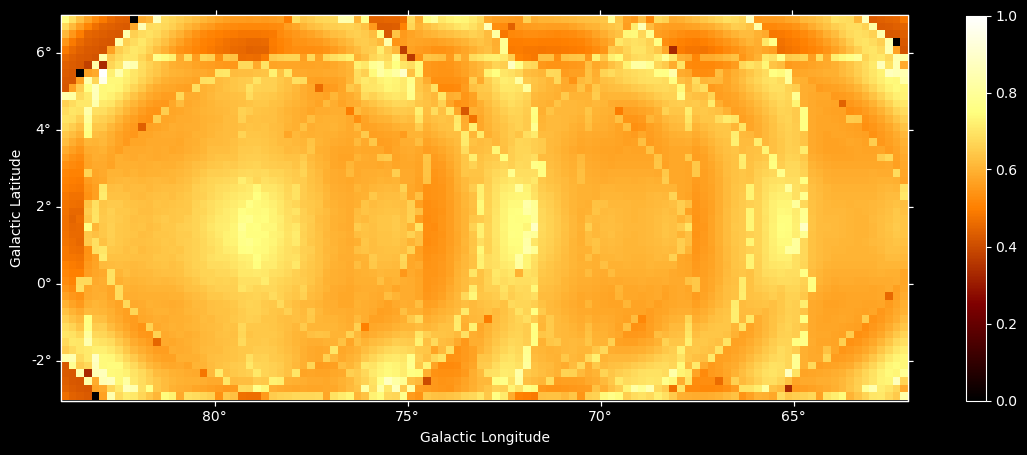

In [8]:
plt.figure(figsize=(15,5))
new_map.plot(add_cbar=True)

In [9]:
pos_cutout = SkyCoord(80, 1.8, frame='galactic', unit='deg')
section = new_map.cutout(pos_cutout, (Angle(2.5 * u.deg), Angle(5 * u.deg)))

<WCSAxesSubplot: >

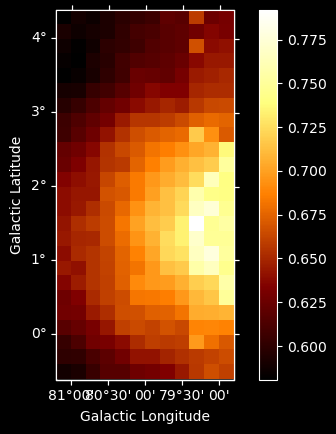

In [10]:
section.plot(add_cbar=True)

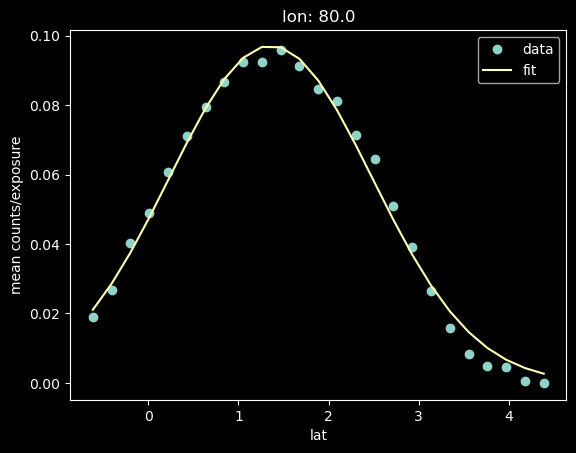

In [11]:
result = GaussianFit(section, axis="lon", plot_gauss=True, minimum=True)

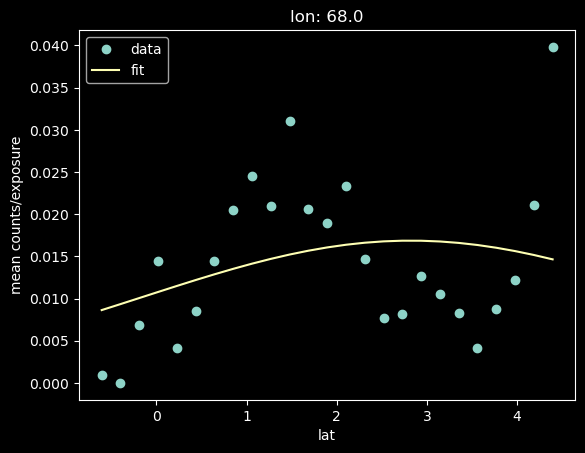

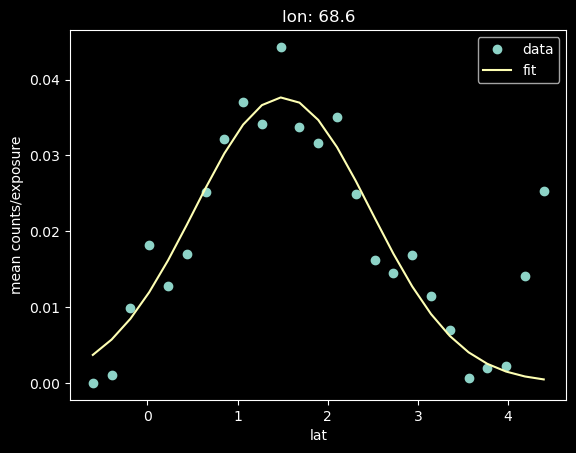

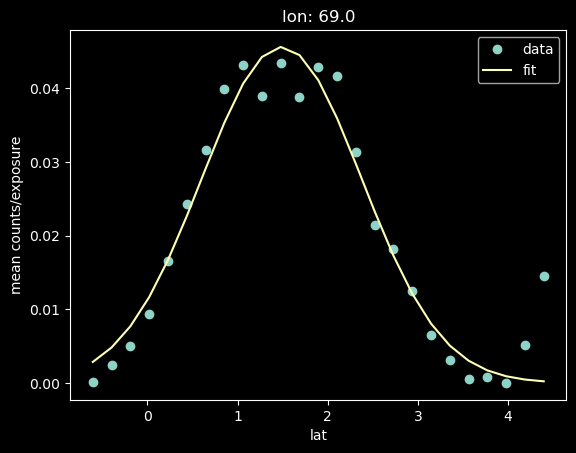

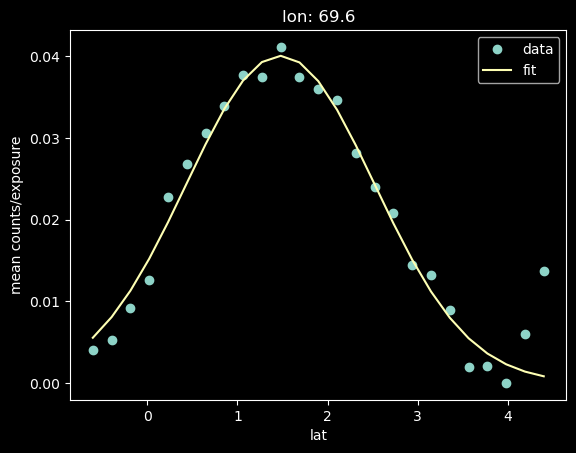

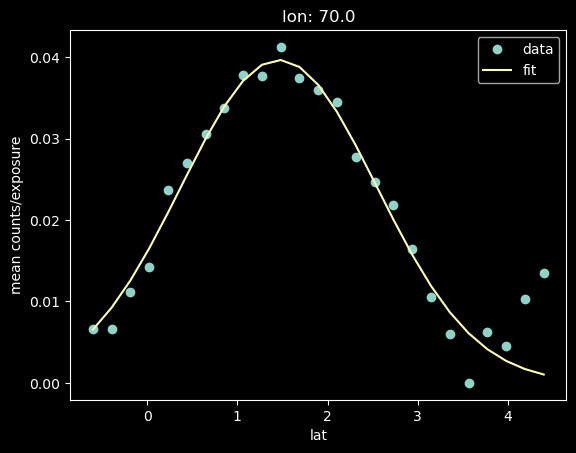

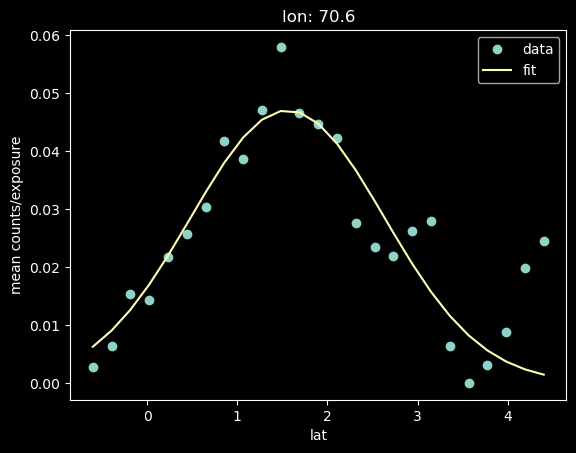

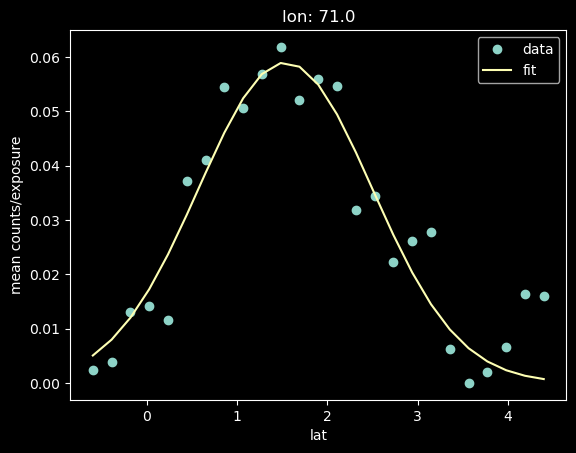

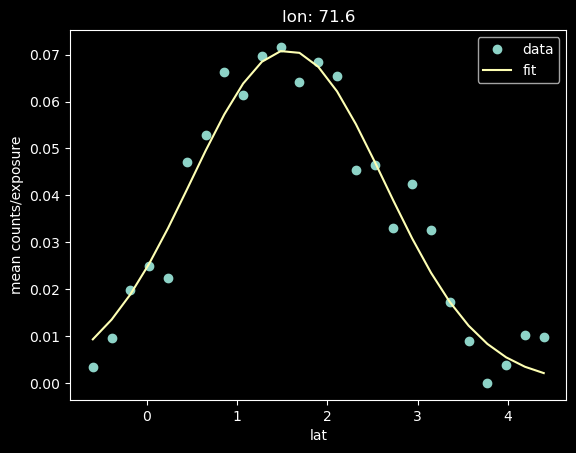

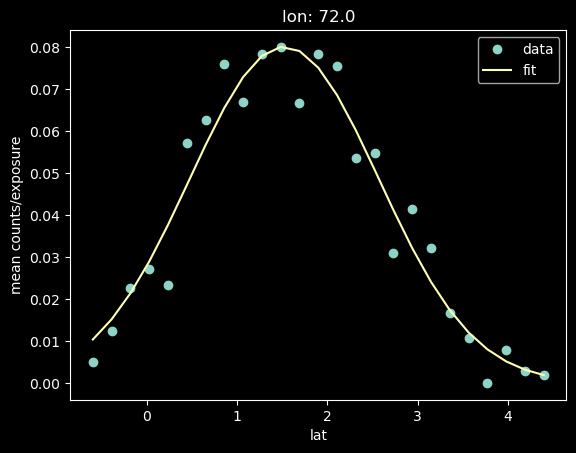

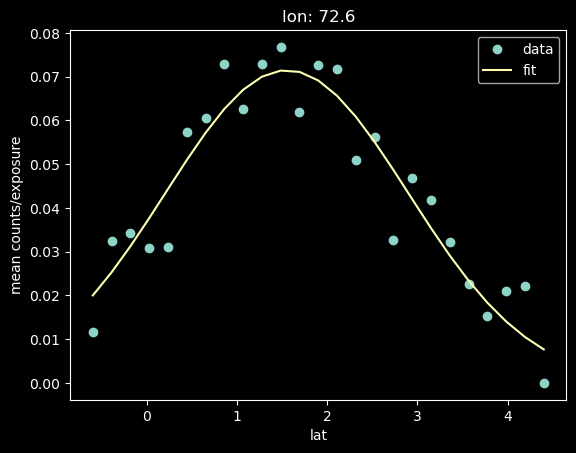

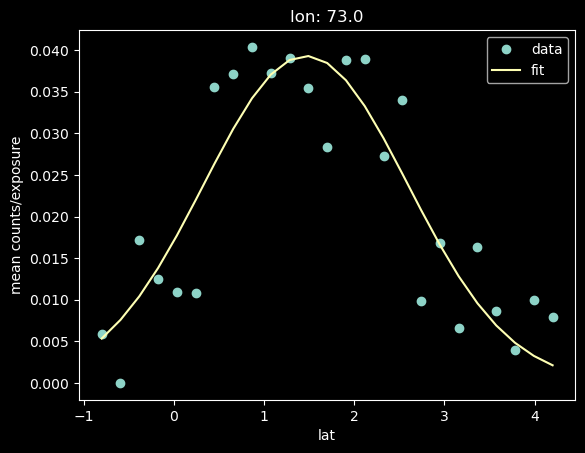

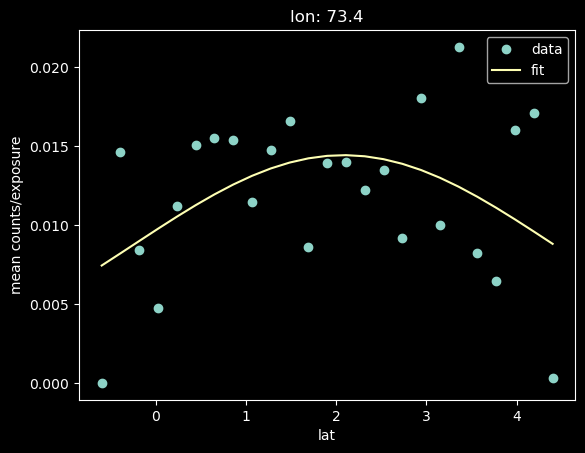

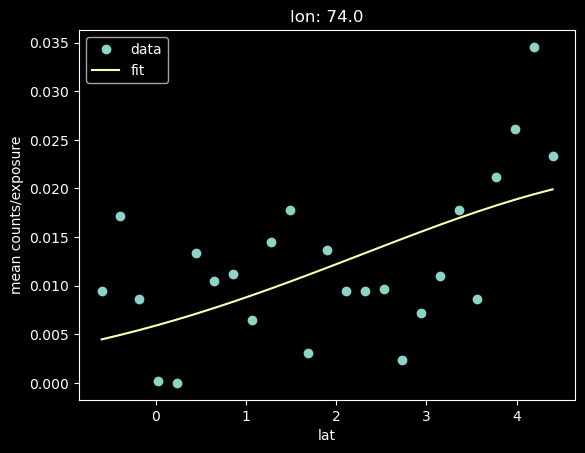

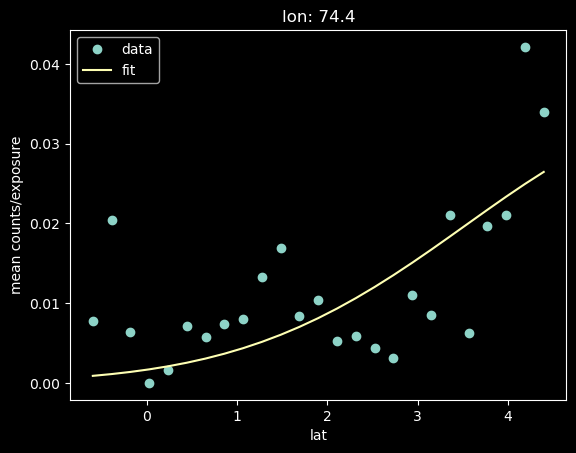

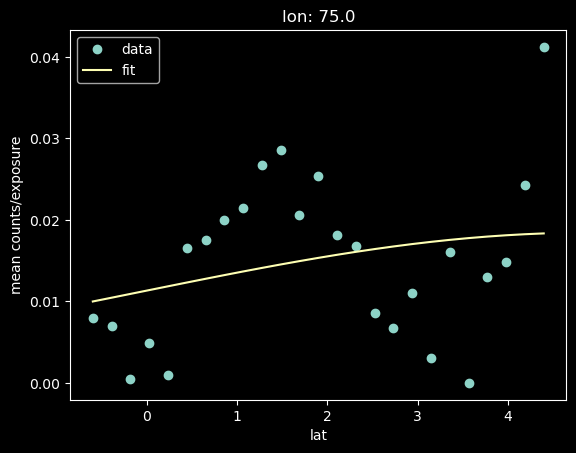

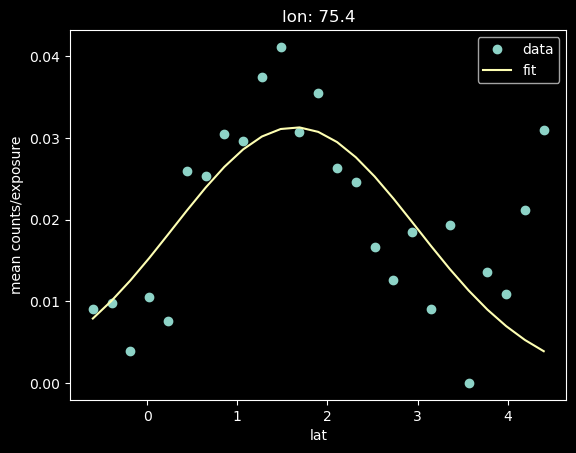

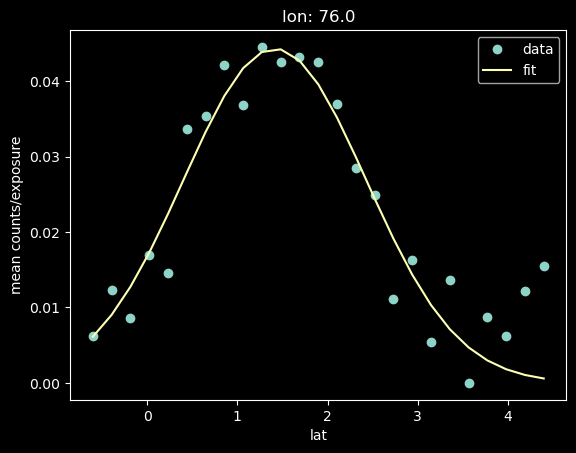

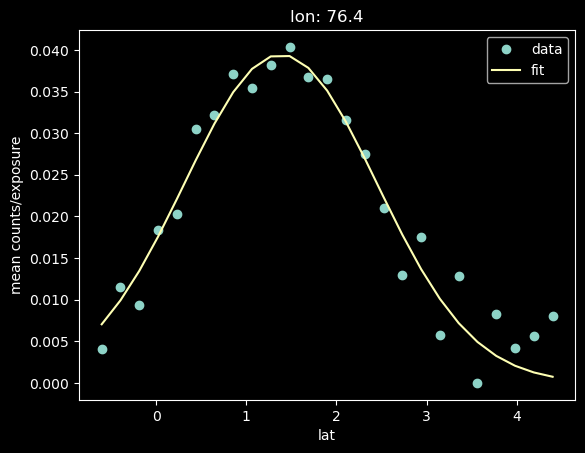

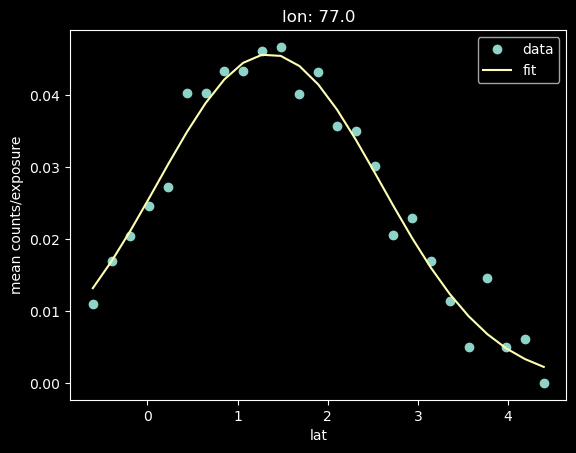

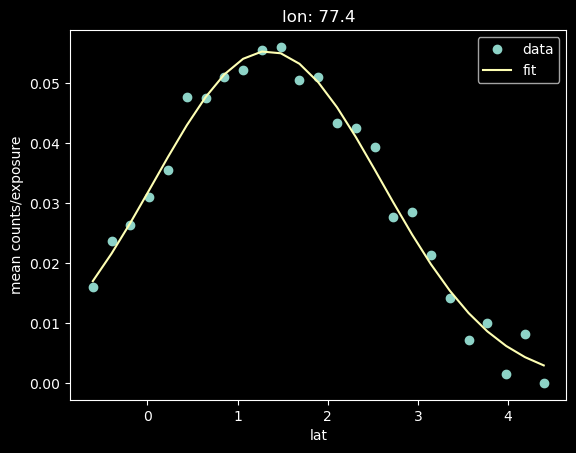

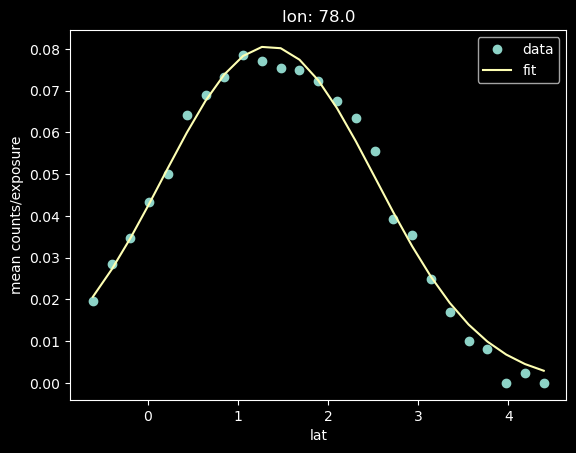

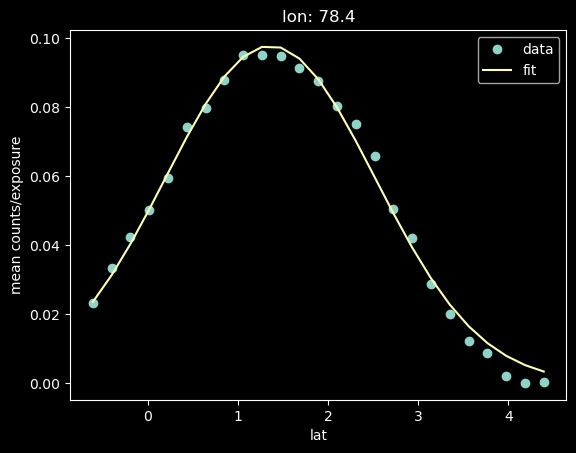

In [12]:
# Create JSON file
with open(f"results_curve_fit.json", "w") as outfile:
    json.dump({}, outfile)

for i in np.arange(68, 79, 0.5):
    pos_cutout = SkyCoord(i, 1.8, frame='galactic', unit='deg')
    section = new_map.cutout(pos_cutout, (Angle(2.5 * u.deg), Angle(5 * u.deg)))
    
    result = GaussianFit(section, axis="lon", plot_gauss=True, minimum=True)
    
    results = {
        str(i): result,
    }
    write_json(results, "results_curve_fit.json")

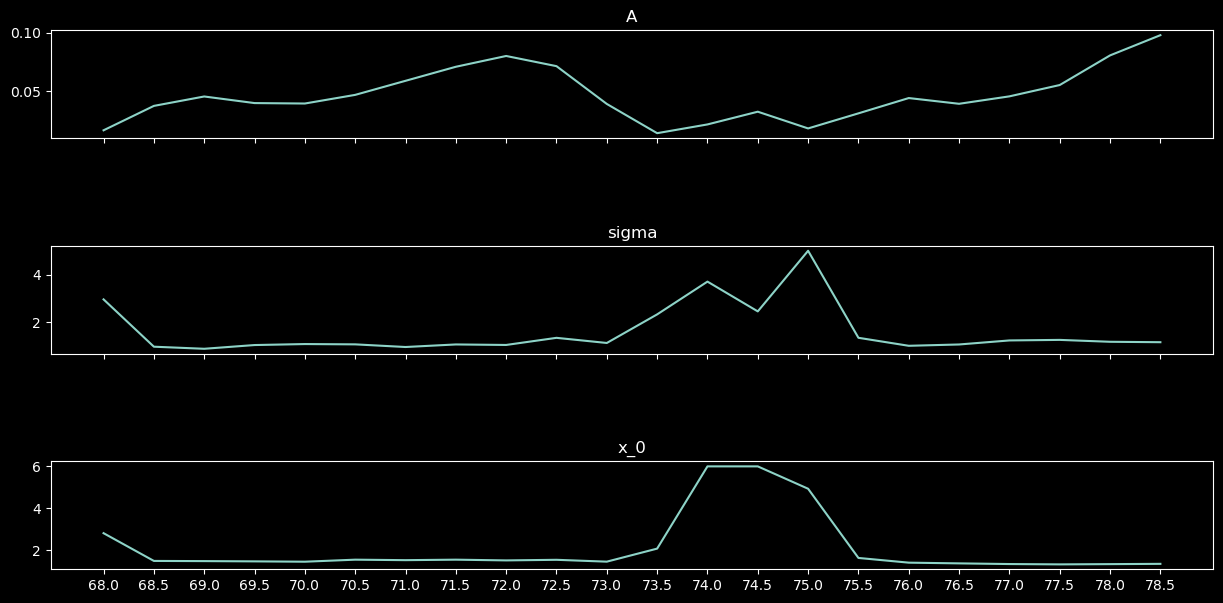

In [13]:
results = read_json(filename="results_curve_fit.json")
plotAllWindowGauss(results)

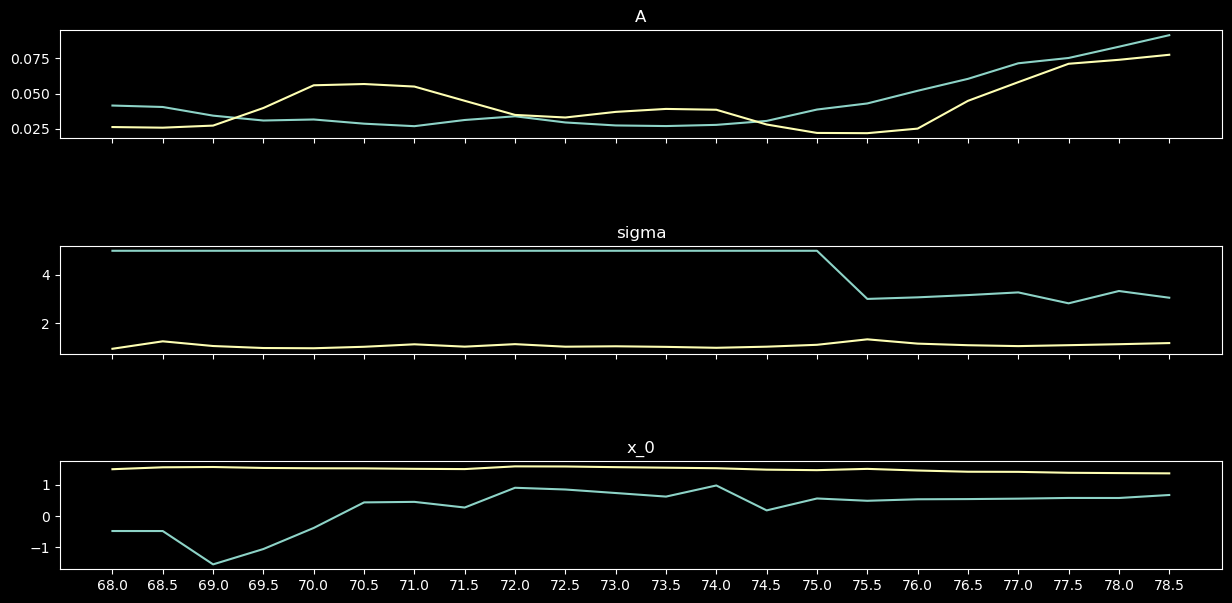

In [20]:
compareAllWindowGauss(results, compare="curve_fit/results_ideal_diff+fermi_excess_22_5_1.8.json")

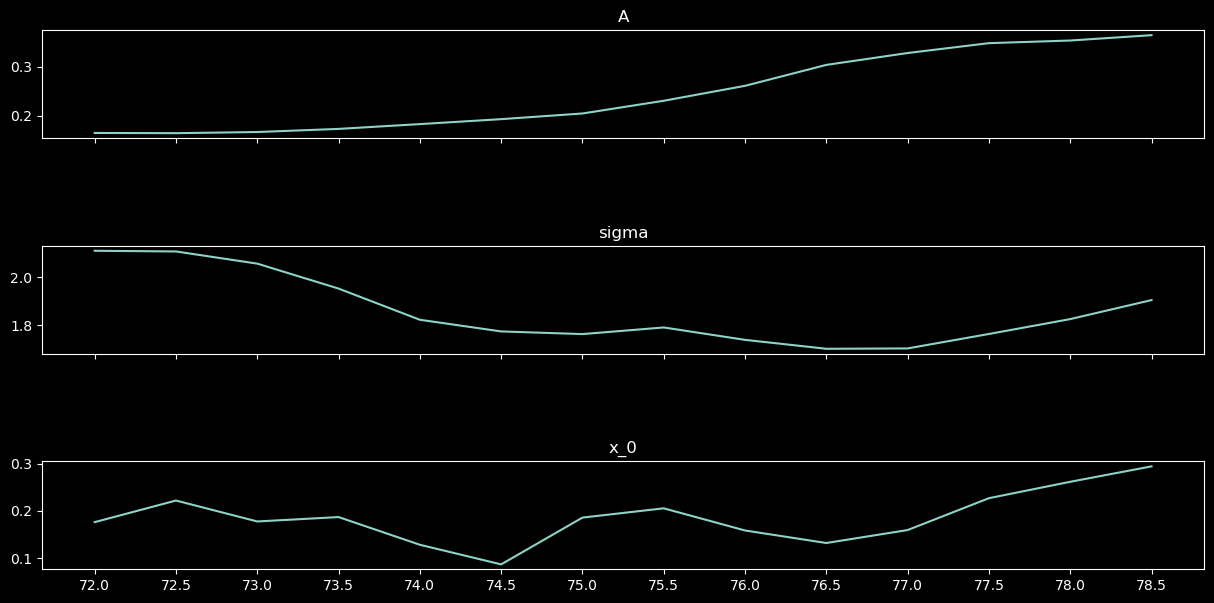

In [18]:
results = read_json(filename="curve_fit/results_ideal.json")
plotAllWindowGauss(results)